# Problem

$\blacktriangleright$ In this case we will solve the incompressible Navier-Stokes equation using the rotational form i.e. the vorticity for the the advection term, this will give us an intrinsic stability overcoming problems related to backflow in the whole domain as much as to the boundaries. The rotational fomulation here will imply the implementation of the total pressure also. Here we will use _Backward Euler_ scheme for time discretizzation while _Galerking_ for space discretizzation

1. The problem in strong form reads
$$
\begin{equation}
    \begin{cases}
        \frac{\partial u}{\partial t} -\nu\Delta u + (w\times u) +\nabla p_T=0 &\quad in\thinspace \Omega \times (0,T)\\
        {\rm div}u=0 &\quad in \thinspace \Omega \times (0,T)\\
        u=0 &\quad in \thinspace \Omega \times (0,T)\\
        (\nu\nabla u -p_TI)\hat{n}=[1,0]^T &\quad on \thinspace \Gamma_{in}\\
        (\nu\nabla u -p_TI)\hat{n}=[0,0]^T &\quad on \thinspace \Gamma_{out}\\
        u\cdot n=0,\thinspace (\nu\nabla u-p_TI)\hat{n}\cdot\hat{t}=0 &\quad on \thinspace \Gamma_{top}\\
        u=0 &\quad on \thinspace \Gamma_{bot}
    \end{cases}
\end{equation}
$$
Here the problem considers both Neumann conditions, Dirichlet (no slip) and the free-slip one (symmetry).

2. Functional Spaces adopted here are
$$
\begin{align*}
    V_0&=\{v\in [H^1(\Omega)]^2_{\Gamma_{top}\cup\Gamma_{bot}}:v\vert_{\Gamma_{bot}}=0,\thinspace v\cdot \hat{n}=0 \thinspace on\thinspace \Gamma_{top}\}\\
    V_D&=\{v\in [H^1(\Omega)]^2_{\Gamma_{top}\cup\Gamma_{bot}}: v\vert_{\Gamma_{bot}}=0,\thinspace v\cdot \hat{n}=0 \thinspace on\thinspace \Gamma_{top}\}\\
    Q&=L_0^2(\Omega)
\end{align*}$$

3. The Weak form of the problem, considering this time the _Fixed Point Iteration_ method for the non-linearities can be written as
$$
\begin{align*}
    \frac{1}{\Delta t}\int_{\Omega}u^{n+1}vd\Omega +\int_{\Omega}\nu\nabla u^{n+1}:\nabla vd\Omega \boxed{-\int_{\Gamma}\nu\nabla u^{n+1}v\hat{n}d\Gamma +\int_{\Gamma}p_T^{n+1}v\hat{n}d\Gamma} -\int_{\Omega}p_T^{n+1}{\rm div}vd\Omega\\+\int_{\Omega}(w^n\times u^{n+1})vd\Omega+\int_{\Omega}q{\rm div}u^{n+1}d\Omega=\frac{1}{\Delta t}\int_{\Omega}u^nvd\Omega
\end{align*}
$$
while on the boundaries since we have Neumann condtions they enters the weak formulation
$$
\begin{align*}
    -\int_{\Gamma_{in}}\nu\nabla u^{n+1}v\hat{n}d\Gamma +\int_{\Gamma_{in}}p_T^{n+1}v\hat{n}d\Gamma&=-\int_{\Gamma_{in}}[1,0]^Tvd\Omega\\
    \int_{\Gamma_{out}}(-\nu\nabla u^{n+1} +p_T^{n+1})\hat{n}\hat{t}vd\Gamma&=0
\end{align*}
$$
therefore the final weak formulation to be implemented is
$$
\begin{align*}
    \frac{1}{\Delta t}\int_{\Omega}u^{n+1}vd\Omega +\int_{\Omega}\nu\nabla u^{n+1}:\nabla vd\Omega  -\int_{\Omega}p^{n+1}{\rm div}vd\Omega -    \int_{\Omega}\frac{1}{2}|u|^2\text{div} vd\Omega+\int_{\Omega}(w^n\times u^{n+1})vd\Omega\\+\int_{\Omega}q{\rm div}u^{n+1}d\Omega=\frac{1}{\Delta t}\int_{\Omega}u^nvd\Omega +\int_{\Gamma_{in}}[1,0]^Tvd\Omega
\end{align*}
$$
</br>
4. the _Perp-operator_ for the vorticity

$$u \mapsto u^{\perp}$$
let $u\in \mathbb{R}^2$ a vectorial function in 2D i.e. a column vector:
$$u=\begin{bmatrix}
    u_1\\
    u_2
\end{bmatrix}\quad J=\begin{bmatrix}
    0 & -1\\
    1 & 0
\end{bmatrix}\rightarrow u^{\perp}=Ju=\begin{bmatrix}
    0 & -1\\
    1 & 0
\end{bmatrix}\begin{bmatrix}
    u_1\\
    u_2
\end{bmatrix}=\begin{bmatrix}
    -u_2\\
    u_1
\end{bmatrix}$$

moreover in 2D $w=\nabla \times u$ is a pseudo-scalar, in order to give it a vectorial notation for the integration, we have to perform the following procedure, linearizing it.

$$(\nabla \times u^n)\times u^{n+1}= (w^n\times u^{n+1})=w^nu^{\perp{(n+1)}}=\begin{bmatrix}
    -w^nu_2^{n+1}\\
    w^nu_1^{n+1}
\end{bmatrix}$$


In [ ]:
try:
    import firedrake
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    import firedrake

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from firedrake import *
import matplotlib.pyplot as plt
import numpy as np

from firedrake.petsc import PETSc

In [ ]:

basename = '...'
outfileU = File("/content/drive/MyDrive/velocity1.pvd")
outfileP = File("/content/drive/MyDrive/pressure1.pvd")

/usr/local/lib/python3.11/dist-packages/firedrake/_deprecation.py:65: UserWarning: The use of `File` for output is deprecated, please update your code to use `VTKFile` from `firedrake.output`.
  warn(


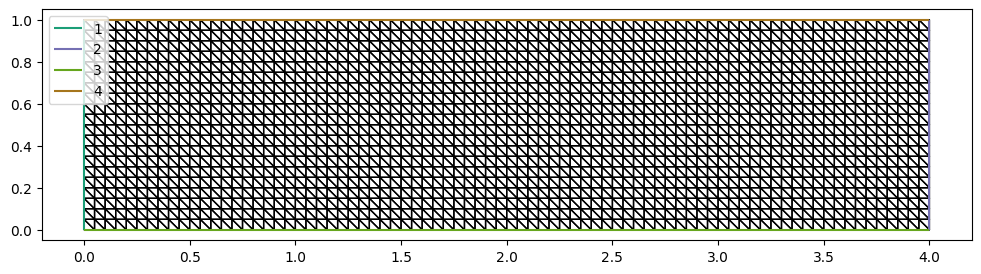

In [ ]:
n=20
mesh = RectangleMesh(4*n, n, 4,1)
fig, ax = plt.subplots(figsize=(12,3))
triplot(mesh, axes=ax)
ax.legend(loc='upper left')

In [ ]:
V=VectorFunctionSpace(mesh,'P',2)
Q=FunctionSpace(mesh,'P',1)
W=MixedFunctionSpace([V,Q])


nu=0.1
dt=0.1
T=10
x=SpatialCoordinate(mesh)
d=as_vector((1,0))
u_noslip=Constant((0,0))
bc_noslip=DirichletBC(W.sub(0),u_noslip,3)
bc_freeslip=DirichletBC(W.sub(0).sub(1),Constant((0)),4)
bcsU=(bc_noslip,bc_freeslip)

u,p=TrialFunctions(W)
v,q=TestFunctions(W)

In [ ]:
def BE_problem(u,v,p,q,u_old,nu,dt,d):
  w=curl(u_old)
  J=as_matrix([[0,-1],[1,0]])
  u_perp=dot(J,u)
  mul=w*u_perp
  a=1/dt*inner(u,v)*dx\
    +nu*inner(grad(u),grad(v))*dx\
    +inner(mul,v)*dx\
    -p*div(v)*dx\
    +q*div(u)*dx\
    -1/2*dot(u,u_old)*div(v)*dx

  L=1/dt*inner(u_old,v)*dx\
    +dot(d,v)*ds(1)
  return a,L

In [ ]:
u,p=TrialFunctions(W)
v,q=TestFunctions(W)

wh=Function(W)
uh,ph=wh.subfunctions

uh_old=Function(V)
ph_old=Function(Q)

uh.interpolate(u_noslip)
ph.interpolate(Constant(0))

uh_old.assign(uh)
ph_old.assign(ph)



a,L=BE_problem(u,v,p,q,uh_old,nu,dt,d)
problem=LinearVariationalProblem(a,L,wh,bcsU)
solver= LinearVariationalSolver(problem)
solver.solve()

In [ ]:
outfileU = File("/content/drive/MyDrive/velocity1.pvd")
outfileP = File("/content/drive/MyDrive/pressure1.pvd")
uh.rename("Velocity")   # this name will be used in Paraview
ph.rename("Pressure")   # this name will be used in Paraview
outfileU.write(uh)
outfileP.write(ph)

In [ ]:
t_vec = np.arange(0, T+0.1*dt, dt)  # T+0.1*dt to include also T: range/arange exclude the upper bound of the range

for ii in range(1, len(t_vec)):     # start from 1 to skip t=0
    t = t_vec[ii]
    print('Time = ', t)
    solver.solve()

    uh.rename("Velocity")
    ph.rename("Pressure")
    outfileU.write(uh)
    outfileP.write(ph)

    uh_old.assign(uh)
    ph_old.assign(ph)

Time =  0.1
Time =  0.2
Time =  0.30000000000000004
Time =  0.4
Time =  0.5
Time =  0.6000000000000001
Time =  0.7000000000000001
Time =  0.8
Time =  0.9
Time =  1.0
Time =  1.1
Time =  1.2000000000000002
Time =  1.3
Time =  1.4000000000000001
Time =  1.5
Time =  1.6
Time =  1.7000000000000002
Time =  1.8
Time =  1.9000000000000001
Time =  2.0
Time =  2.1
Time =  2.2
Time =  2.3000000000000003
Time =  2.4000000000000004
Time =  2.5
Time =  2.6
Time =  2.7
Time =  2.8000000000000003
Time =  2.9000000000000004
Time =  3.0
Time =  3.1
Time =  3.2
Time =  3.3000000000000003
Time =  3.4000000000000004
Time =  3.5
Time =  3.6
Time =  3.7
Time =  3.8000000000000003
Time =  3.9000000000000004
Time =  4.0
Time =  4.1000000000000005
Time =  4.2
Time =  4.3
Time =  4.4
Time =  4.5
Time =  4.6000000000000005
Time =  4.7
Time =  4.800000000000001
Time =  4.9
Time =  5.0
Time =  5.1000000000000005
Time =  5.2
Time =  5.300000000000001
Time =  5.4
Time =  5.5
Time =  5.6000000000000005
Time =  5.7
Ti

Text(0.5, 1.0, 'velocity')

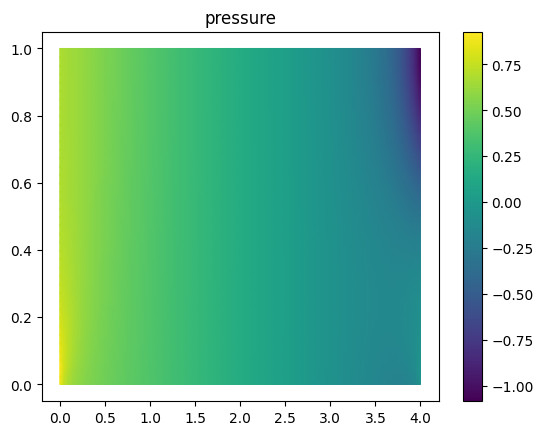

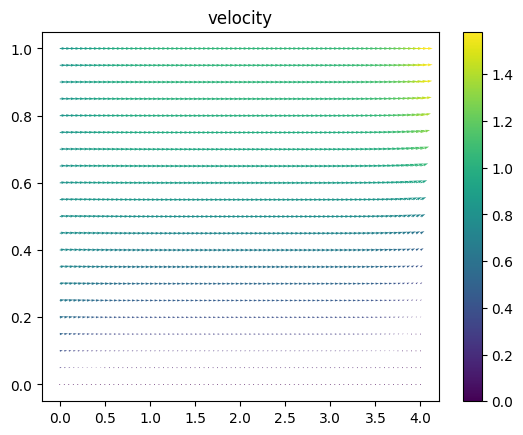

In [ ]:
fig, ax = plt.subplots()
col = tripcolor(ph, axes=ax)
plt.colorbar(col)
plt.title('pressure')
fig, ax = plt.subplots()
col = quiver(uh, axes=ax)
plt.colorbar(col)
plt.title('velocity')